In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as DT
import io

In [3]:
df=pd.read_csv('master_data/Premi_ClubQ8.csv', sep=';', index_col='COD_PAN_DA_POS')

/Users/eduardomaia/PycharmProjects/GBAC_Q8_2021/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [162]:
df_head = df.head(1000)

In [163]:
# see the caategorical variables and the absolute variables
cols_focus_cat = [
    'LUOGO_PRENOTAZIONE_PREMIO',
    'CATEGORIA',
    'RAGGRUPPAMENTO_MERCEOLOGICO',
    'DESCRIZIONE',
]
cols_focus_num = [
    'PUNTI_RICHIESTI',
    'CONTRIBUTO_CLIENTE_CON_IVA',
]

In [164]:
cols_focus = cols_focus_cat + cols_focus_num

In [165]:
df[cols_focus_num].describe().transpose()

,count,unique,top,freq
PUNTI_RICHIESTI,501220,324,430,160070
CONTRIBUTO_CLIENTE_CON_IVA,463554,42,"0,000000",389550


In [166]:
df[cols_focus_cat].astype(str).describe().transpose()

,count,unique,top,freq
LUOGO_PRENOTAZIONE_PREMIO,501449,2,PUNTO VENDITA,469059
CATEGORIA,501449,2,BUONO SCONTO CARBURANTE,272660
RAGGRUPPAMENTO_MERCEOLOGICO,501449,20,BUONO SCONTO CARBURANTE,272660
DESCRIZIONE,501449,393,BUONO SCONTO CARB 4E 430 PUNTI,88550


In [167]:
def get_frequencies(series: pd.Series, n_categories: int = None, 
                    bins: int = None, dropna: bool = True
                    ) -> pd.DataFrame:
    vc = series.value_counts(ascending=False,
                             bins=bins,
                             dropna=dropna
                            ) 
    if n_categories is not None:
        if not isinstance(n_categories, int) or n_categories <= 0:
            raise TypeError('n_categories should be a strictly positive integer')
        if n_categories < len(vc):
            freq_others = vc.iloc[n_categories - 1:].sum()
            vc = vc.iloc[:n_categories - 1]\
                   .append(pd.Series({'others': freq_others}))
    return pd.DataFrame({'absolute': vc,
                         'relative': vc / len(series) * 100,
                         },
                        index=vc.index
                        )

In [168]:
get_frequencies(df['CATEGORIA'], n_categories=2)

,absolute,relative
BUONO SCONTO CARBURANTE,272660,54.374423
PREMIO FISICO,228789,45.625577


In [169]:
get_frequencies(df['LUOGO_PRENOTAZIONE_PREMIO'], n_categories=2)

,absolute,relative
PUNTO VENDITA,469059,93.540719
ONLINE,32390,6.459281


In [170]:
get_frequencies(df['RAGGRUPPAMENTO_MERCEOLOGICO'], n_categories=20)

,absolute,relative
BUONO SCONTO CARBURANTE,272660,54.374423
PER LA TUA CASA,68450,13.650441
PER TE,30569,6.096133
ELETTRONICA,24924,4.970396
TAVOLA & CUCINA,20407,4.069606
CASA,18529,3.695092
ELETTRODOMESTICI,17489,3.487693
PER IL TUO BENESSERE,14858,2.963013
TEMPO LIBERO,9569,1.908270
MODA,7237,1.443218


In [171]:
len(df[df['DESCRIZIONE'].str.contains('ANNULLO ')])


435

In [172]:
get_frequencies(df['DESCRIZIONE'], n_categories=393)

,absolute,relative
BUONO SCONTO CARB 4E 430 PUNTI,88550,17.658825
BUONO SCONTO CARB 4E 860 PUNTI,70302,14.019771
BUONO SCONTO CARB 4E 1290 PUNTI,66117,13.185189
BUONO SCONTO CARB 4E 2580 PUNTI,47553,9.483118
CONSEGNA PASTA GAROFALO,30722,6.126645
...,...,...
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE,1,0.000199
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO,1,0.000199
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO,1,0.000199
ANNULLO PRENOTAZIONE OROLOGIO UOMO,1,0.000199


In [173]:
df['DESCRIZIONE'].value_counts()

BUONO SCONTO CARB 4E 430 PUNTI                        88550
BUONO SCONTO CARB 4E 860 PUNTI                        70302
BUONO SCONTO CARB 4E 1290 PUNTI                       66117
BUONO SCONTO CARB 4E 2580 PUNTI                       47553
CONSEGNA PASTA GAROFALO                               30722
                                                      ...  
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE                     1
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO        1
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO                    1
ANNULLO PRENOTAZIONE OROLOGIO UOMO                        1
ANNULLO PRENOTAZIONE GALAXY A12 BLACK                     1
Name: DESCRIZIONE, Length: 393, dtype: int64

In [174]:
get_frequencies(df['DESCRIZIONE'], n_categories=393)

,absolute,relative
BUONO SCONTO CARB 4E 430 PUNTI,88550,17.658825
BUONO SCONTO CARB 4E 860 PUNTI,70302,14.019771
BUONO SCONTO CARB 4E 1290 PUNTI,66117,13.185189
BUONO SCONTO CARB 4E 2580 PUNTI,47553,9.483118
CONSEGNA PASTA GAROFALO,30722,6.126645
...,...,...
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE,1,0.000199
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO,1,0.000199
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO,1,0.000199
ANNULLO PRENOTAZIONE OROLOGIO UOMO,1,0.000199


In [175]:
df['CATEGORIA'].value_counts()

BUONO SCONTO CARBURANTE    272660
PREMIO FISICO              228789
Name: CATEGORIA, dtype: int64

In [176]:
df['LUOGO_PRENOTAZIONE_PREMIO'].value_counts()

PUNTO VENDITA    469059
ONLINE            32390
Name: LUOGO_PRENOTAZIONE_PREMIO, dtype: int64

In [177]:
df['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts()

BUONO SCONTO CARBURANTE    272660
PER LA TUA CASA             68450
PER TE                      30569
ELETTRONICA                 24924
TAVOLA & CUCINA             20407
CASA                        18529
ELETTRODOMESTICI            17489
PER IL TUO BENESSERE        14858
TEMPO LIBERO                 9569
MODA                         7237
SPORT                        3438
PER IL TUO AMBIENTE          2849
PER IL TUO BAMBINO           2837
PER IL TUO VIAGGIO           2171
BAMBINI                      1749
AMICI A 4 ZAMPE              1554
GUARDA & PRENOTA             1366
BELLEZZA & BENESSERE          698
PER IL  TUO CUCCIOLO           60
ONLUS & PROGETTI               35
Name: RAGGRUPPAMENTO_MERCEOLOGICO, dtype: int64

In [178]:
df['DESCRIZIONE'].value_counts()

BUONO SCONTO CARB 4E 430 PUNTI                        88550
BUONO SCONTO CARB 4E 860 PUNTI                        70302
BUONO SCONTO CARB 4E 1290 PUNTI                       66117
BUONO SCONTO CARB 4E 2580 PUNTI                       47553
CONSEGNA PASTA GAROFALO                               30722
                                                      ...  
ANNULLO PRENOTAZIONE OROL.+ BRACCIALE                     1
ANNULLO PRENOTAZIONE SECTOR OROLOGIO +BRACCIALE DO        1
ANNULLO PRENOTAZIONE PINZA SCOLAFRITTO                    1
ANNULLO PRENOTAZIONE OROLOGIO UOMO                        1
ANNULLO PRENOTAZIONE GALAXY A12 BLACK                     1
Name: DESCRIZIONE, Length: 393, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

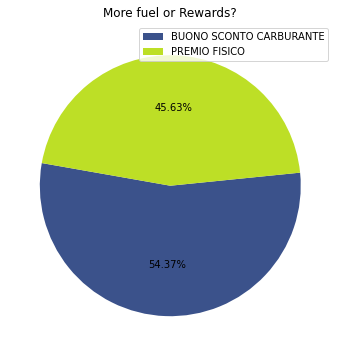

In [179]:
tmp = get_frequencies(df['CATEGORIA'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="More fuel or Rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='')
plt.show


In [20]:
prize_description = df["DESCRIZIONE"].value_counts()
prize_description = prize_description.index.to_list()
prize_description = sorted(prize_description)
prize_description = prize_description[106:]

prize_description

['BUONO SCONTO CARB 4E 1290 PUNTI',
 'BUONO SCONTO CARB 4E 2580 PUNTI',
 'BUONO SCONTO CARB 4E 430 PUNTI',
 'BUONO SCONTO CARB 4E 450 PUNTI',
 'BUONO SCONTO CARB 4E 860 PUNTI',
 'CONSEGNA CODICE 50 STAMPE FOTO',
 'CONSEGNA CODICE ABBON FAI',
 'CONSEGNA CODICE ALBERO TREEDOM',
 'CONSEGNA CODICE ASPARAGIERA',
 'CONSEGNA CODICE ASPIR IROBOT',
 'CONSEGNA CODICE ASSE DA STIRO',
 'CONSEGNA CODICE ASSE DA STIRO FOPPAPEDRETTI',
 'CONSEGNA CODICE AVIS DREAM CAR 1G',
 'CONSEGNA CODICE AVIS DREAM CAR 1GG',
 'CONSEGNA CODICE AVIS DREAMCAR 1GG',
 'CONSEGNA CODICE BISTECCHIERA',
 'CONSEGNA CODICE BUDGET FAMILY',
 'CONSEGNA CODICE BUDGET NOL 1G',
 'CONSEGNA CODICE CUCINA MODERNA SEM',
 'CONSEGNA CODICE DONNA MODERNA SEM',
 'CONSEGNA CODICE DOVE SEM',
 'CONSEGNA CODICE DUERUOTE 6MESI',
 'CONSEGNA CODICE FOCUS JUNIOR SEM',
 'CONSEGNA CODICE FOCUS SEM',
 'CONSEGNA CODICE GARDALAND',
 'CONSEGNA CODICE GARDALAND PARK',
 'CONSEGNA CODICE GIFT AMILON 100?',
 'CONSEGNA CODICE GIFT AMILON 20?',
 'CONSEGNA COD

<function matplotlib.pyplot.show(close=None, block=None)>

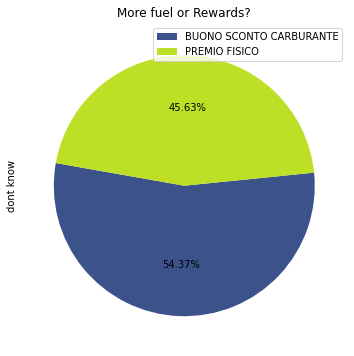

In [21]:
tmp = get_frequencies(df['CATEGORIA'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="More fuel or Rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

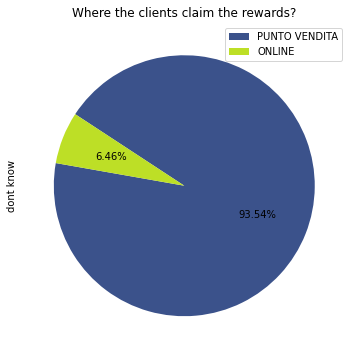

In [22]:
tmp = get_frequencies(df['LUOGO_PRENOTAZIONE_PREMIO'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="Where the clients claim the rewards?", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

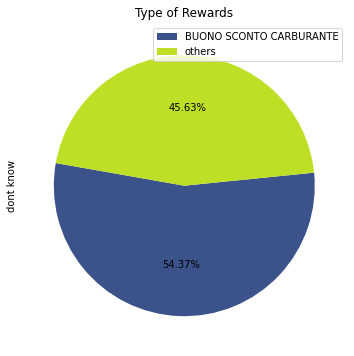

In [23]:
tmp = get_frequencies(df['RAGGRUPPAMENTO_MERCEOLOGICO'], n_categories=2)['relative']
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='pie',
              title="Type of Rewards", autopct='{:02.2f}%'.format,
              legend=True,
              labeldistance=None,
              startangle=170,
              colors=[cmap(i) for i in np.linspace(.25, .9, len(tmp
 ))],
              figsize=(6, 6)
             )
ax.set(ylabel='dont know')
plt.show

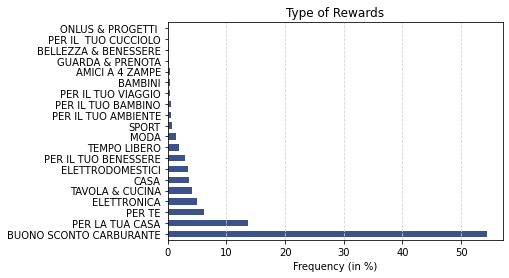

In [24]:
tmp = df['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

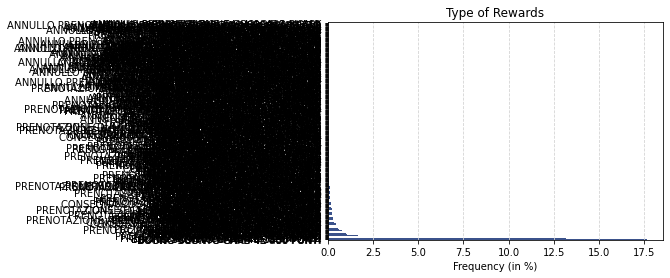

<Figure size 432x288 with 0 Axes>

In [25]:
tmp = df['DESCRIZIONE'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()
plt.tight_layout()

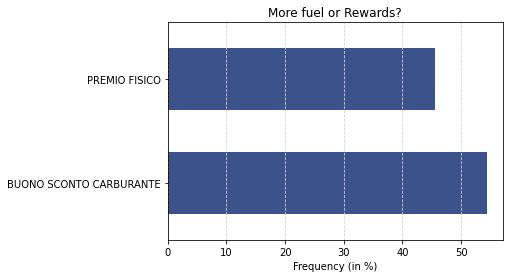

In [26]:
tmp = df['CATEGORIA'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="More fuel or Rewards?",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

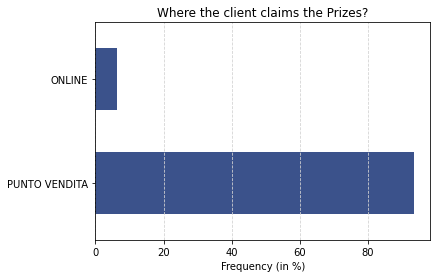

In [27]:
tmp = df['LUOGO_PRENOTAZIONE_PREMIO'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Where the client claims the Prizes?",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

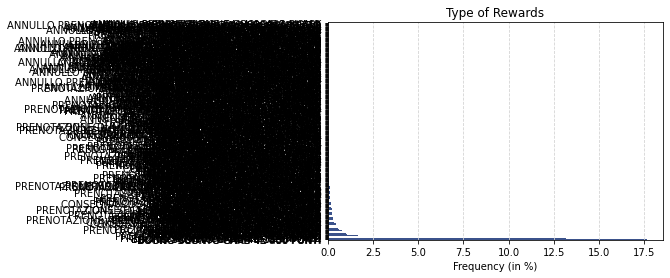

In [28]:
tmp = df['DESCRIZIONE'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
#plt.tight_layout()
plt.show()

In [ ]:
#favorite prizes- some trends
tmp = df['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(df) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

In [6]:
df["DATA_OPERAZIONE"] = df["DATA_OPERAZIONE"].astype("datetime64")
df["DATA_OPERAZIONE"] =df["DATA_OPERAZIONE"].dt.date
df["DATA_OPERAZIONE"] = df["DATA_OPERAZIONE"].astype("datetime64")

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
COD_PAN_DA_POS,,,,,,,
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603670014604,2020-09-01,ONLINE,PREMIO FISICO,PER LA TUA CASA,CONSEGNA CODICE GIFT CARDS 20E AMAZON,1800,NaN
7071161603014051338,2020-09-01,PUNTO VENDITA,PREMIO FISICO,PER TE,PRENOTAZIONE PORTA CARTE CREDITO SPARCO,450,"0,000000"
...,...,...,...,...,...,...,...
7071161603014068530,2021-08-31,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395.0,"0,000000"
7071161603670271808,2021-08-31,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500.0,"30,000000"
7071161603014068530,2021-08-31,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200.0,"15,000000"


In [26]:
#See if categories of prizes change over time 
AUTUMN = (df["DATA_OPERAZIONE"] > '2020-08-31') & (df["DATA_OPERAZIONE"] < '2020-12-21')
AUTUMN_FAV = df.loc[AUTUMN]



In [27]:
Winter = (df["DATA_OPERAZIONE"] > '2020-12-20') & (df["DATA_OPERAZIONE"] < '2021-03-21')
WINTER_FAV = df.loc[Winter]
WINTER_FAV

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
COD_PAN_DA_POS,,,,,,,
7071161603013903273,2020-12-21,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE MISUR PRESSIONE,1738,"0,000000"
7071161603007864119,2020-12-21,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE 4 CALZINI UOMO,650,"0,000000"
7071161603007864119,2020-12-21,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE BICCHIERE GUZZINI,100,"0,000000"
7071161603670549096,2020-12-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 5?,650,NaN
7071161603007864408,2020-12-21,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE CARAFFA VENICE GUZZINI,1450,"4,000000"
...,...,...,...,...,...,...,...
7071161603014288120,2021-03-20,PUNTO VENDITA,PREMIO FISICO,TEMPO LIBERO,PRENOTAZIONE TRAVEL MUG,750,"0,000000"
7071161603011411584,2021-03-20,PUNTO VENDITA,PREMIO FISICO,CASA,PRENOTAZIONE POUF,1200,"3,000000"
7071161603600085054,2021-03-20,PUNTO VENDITA,PREMIO FISICO,TAVOLA & CUCINA,PRENOTAZIONE CUOCI RISO,350,"0,000000"


In [49]:
Spring = (df["DATA_OPERAZIONE"] > '2021-03-20') & (df["DATA_OPERAZIONE"] < '2021-06-21')
SPRING_FAV = df.loc[Spring]
SPRING_FAV

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
COD_PAN_DA_POS,,,,,,,
7071161603013004585,2021-03-21,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE 4 CALZINI UOMO,650,"0,000000"
7071161603670248178,2021-03-21,PUNTO VENDITA,PREMIO FISICO,BAMBINI,PRENOTAZIONE 3 CALZINI BIMBI,550,"0,000000"
7071161603013004585,2021-03-21,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OCCHIALI D.SOLE,3775,"0,000000"
7071161603002353464,2021-03-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 5?,650,NaN
7071161603002522829,2021-03-21,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE 4 CALZINI UOMO,650,"0,000000"
...,...,...,...,...,...,...,...
7071161603005270087,2021-06-20,PUNTO VENDITA,PREMIO FISICO,TAVOLA & CUCINA,PRENOTAZIONE CUOCI RISO,350.0,"0,000000"
7071161603000875609,2021-06-20,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE BICCHIERE GUZZINI 4PZ,350.0,"0,000000"
7071161603000875609,2021-06-20,PUNTO VENDITA,PREMIO FISICO,PER LA TUA CASA,PRENOTAZIONE BICCHIERE GUZZINI 4PZ,350.0,"0,000000"


In [50]:
Summer = (df["DATA_OPERAZIONE"] > '2021-06-20') & (df["DATA_OPERAZIONE"] < '2021-09-21')
SUMMER_FAV = df.loc[Summer]
SUMMER_FAV

,DATA_OPERAZIONE,LUOGO_PRENOTAZIONE_PREMIO,CATEGORIA,RAGGRUPPAMENTO_MERCEOLOGICO,DESCRIZIONE,PUNTI_RICHIESTI,CONTRIBUTO_CLIENTE_CON_IVA
COD_PAN_DA_POS,,,,,,,
7071161603000541409,2021-06-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 20?,2600.0,NaN
7071161603014909626,2021-06-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 20?,2600.0,NaN
7071161603672827748,2021-06-21,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,5813.0,"0,000000"
7071161603016223992,2021-06-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 20?,2600.0,NaN
7071161603014909626,2021-06-21,ONLINE,PREMIO FISICO,PER TE,CONSEGNA CODICE GIFT AMILON 5?,650.0,NaN
...,...,...,...,...,...,...,...
7071161603014068530,2021-08-31,PUNTO VENDITA,PREMIO FISICO,ELETTRODOMESTICI,PRENOTAZIONE PHILIPS RASOIO,2395.0,"0,000000"
7071161603670271808,2021-08-31,PUNTO VENDITA,PREMIO FISICO,MODA,PRENOTAZIONE OROLOGIO SECTOR,3500.0,"30,000000"
7071161603014068530,2021-08-31,PUNTO VENDITA,PREMIO FISICO,ELETTRONICA,PRENOTAZIONE AVVITATORE,4200.0,"15,000000"


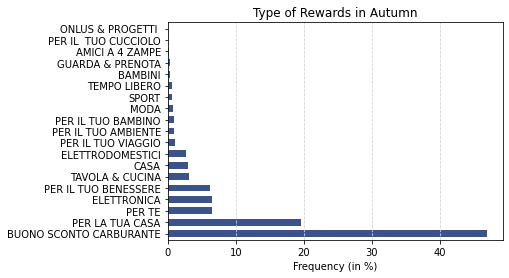

In [51]:
#favorite prizes- some trends
tmp = AUTUMN_FAV['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(AUTUMN_FAV) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards in Autumn",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

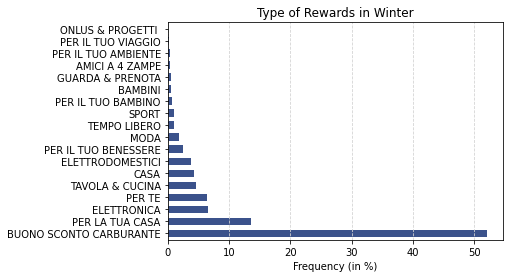

In [52]:
tmp = WINTER_FAV['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(WINTER_FAV) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards in Winter",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

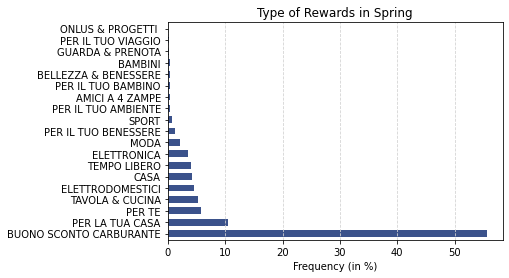

In [53]:
tmp = SPRING_FAV['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(SPRING_FAV) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards in Spring",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

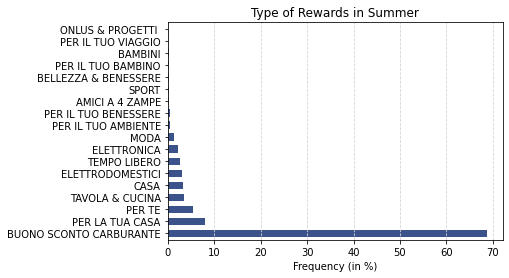

In [54]:
tmp = SUMMER_FAV['RAGGRUPPAMENTO_MERCEOLOGICO'].value_counts() / len(SUMMER_FAV) * 100
cmap = cm.get_cmap('viridis')
ax = tmp.plot(kind='barh',
              title="Type of Rewards in Summer",
              color=cmap(.25),
              width=.6,
              )
ax.grid(True, axis='x', color='lightgrey', linestyle='--')
ax.set(xlabel='Frequency (in %)')
plt.show()

In [55]:
df['DESCRIZIONE'].value_counts().head(10)

BUONO SCONTO CARB 4E 430 PUNTI        88550
BUONO SCONTO CARB 4E 860 PUNTI        70302
BUONO SCONTO CARB 4E 1290 PUNTI       66117
BUONO SCONTO CARB 4E 2580 PUNTI       47553
CONSEGNA PASTA GAROFALO               30722
PRENOTAZIONE BICCHIERE GUZZINI 4PZ    15623
CONSEGNA CODICE GIFT AMILON 5?        14970
PRENOTAZIONE MASCHERINA TOMBOLINI      8342
PRENOTAZIONE PHILIPS RASOIO            6823
PRENOTAZIONE MISUR PRESSIONE           5309
Name: DESCRIZIONE, dtype: int64

In [56]:
WINTER_FAV['DESCRIZIONE'].value_counts().head(10)

BUONO SCONTO CARB 4E 430 PUNTI        21012
BUONO SCONTO CARB 4E 860 PUNTI        16504
BUONO SCONTO CARB 4E 1290 PUNTI       15259
BUONO SCONTO CARB 4E 2580 PUNTI       10791
CONSEGNA PASTA GAROFALO                7500
PRENOTAZIONE BICCHIERE GUZZINI 4PZ     5031
CONSEGNA CODICE GIFT AMILON 5?         3867
PRENOTAZIONE MASCHERINA TOMBOLINI      2056
PRENOTAZIONE PHILIPS RASOIO            1801
PRENOTAZIONE KIT 38 UTENSILI           1605
Name: DESCRIZIONE, dtype: int64

In [57]:
AUTUMN_FAV['DESCRIZIONE'].value_counts().head(10)

BUONO SCONTO CARB 4E 430 PUNTI        24853
BUONO SCONTO CARB 4E 860 PUNTI        19588
BUONO SCONTO CARB 4E 1290 PUNTI       18252
BUONO SCONTO CARB 4E 2580 PUNTI       12142
CONSEGNA PASTA GAROFALO               12132
PRENOTAZIONE BICCHIERE GUZZINI 4PZ     4898
PRENOTAZIONE MASCHERINA TOMBOLINI      4526
CONSEGNA MASCHERINA TOMBOLINI          3177
CONSEGNA CODICE GIFT AMILON 5?         2799
PRENOTAZIONE SET SPUGNE C.I.           2563
Name: DESCRIZIONE, dtype: int64

In [58]:
SPRING_FAV['DESCRIZIONE'].value_counts().head(10)

BUONO SCONTO CARB 4E 430 PUNTI        23025
BUONO SCONTO CARB 4E 860 PUNTI        18064
BUONO SCONTO CARB 4E 1290 PUNTI       16870
BUONO SCONTO CARB 4E 2580 PUNTI       12030
CONSEGNA PASTA GAROFALO                6884
CONSEGNA CODICE GIFT AMILON 5?         4729
PRENOTAZIONE BICCHIERE GUZZINI 4PZ     3749
CONSEGNA CODICE SET PIATTI 18PZ        2131
PRENOTAZIONE PHILIPS RASOIO            1932
CONSEGNA CODICE GIFT AMILON 20?        1672
Name: DESCRIZIONE, dtype: int64

In [59]:
SUMMER_FAV['DESCRIZIONE'].value_counts().head(10)

BUONO SCONTO CARB 4E 430 PUNTI        19660
BUONO SCONTO CARB 4E 860 PUNTI        16146
BUONO SCONTO CARB 4E 1290 PUNTI       15736
BUONO SCONTO CARB 4E 2580 PUNTI       12590
CONSEGNA PASTA GAROFALO                4206
CONSEGNA CODICE GIFT AMILON 5?         3575
PRENOTAZIONE BICCHIERE GUZZINI 4PZ     1945
PRENOTAZIONE PHILIPS RASOIO            1156
PRENOTAZIONE IDROPULITRICE KARCHER     1041
CONSEGNA CODICE GIFT AMILON 20?        1024
Name: DESCRIZIONE, dtype: int64

In [40]:
dg=pd.read_csv('master_data/Anagrafica_ClubQ8.csv', sep=';',index_col='COD_PAN_DA_POS')

In [41]:
dg.sort_index()

,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI
COD_PAN_DA_POS,,,,,,,,
7071161603000000976,F,1979-09-06 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-02-28 10:36:06,"3949,000000"
7071161603000000992,F,1961-10-01 00:00:00,LAZIO,ROMA,ROMA,STARQ8_FISICA,2002-10-19 18:44:00,"2110,000000"
7071161603000001156,F,1984-10-23 00:00:00,EMILIA ROMAGNA,PIACENZA,PIACENZA,STARQ8_FISICA,2019-07-23 18:33:29,"1921,000000"
7071161603000001164,M,1969-10-23 00:00:00,EMILIA ROMAGNA,PIACENZA,PIACENZA,STARQ8_FISICA,2019-07-22 15:28:13,"1798,000000"
7071161603000001172,M,1964-06-06 00:00:00,EMILIA ROMAGNA,PIACENZA,PIACENZA,STARQ8_FISICA,2019-08-05 18:43:58,"1278,000000"
...,...,...,...,...,...,...,...,...
7071161603690008206,M,1972-05-24 00:00:00,PIEMONTE,VERCELLI,BORGOSESIA,STARQ8_FISICA,2019-06-13 07:57:22,"10836,000000"
7071161603690008222,M,1982-08-08 00:00:00,PIEMONTE,VERBANIA,VERBANIA,STARQ8_FISICA,2019-06-11 11:15:00,"3112,000000"
7071161603690008248,F,1960-10-08 00:00:00,CAMPANIA,NAPOLI,NAPOLI,STARQ8_FISICA,2019-10-01 08:52:20,"148,000000"


In [38]:
#Client distribution is on the Tom and Tracys data exploration 

In [ ]:
##When did clients join Q8 Loyalty Program?##

In [45]:
dg.dtypes

SEX               object
DATA_NASCITA      object
REGIONE           object
PROVINCIA         object
COMUNE            object
TIPO_CARTA        object
DATA_BATTESIMO    object
SALDO_PUNTI       object
dtype: object

In [74]:
dg["DATA_BATTESIMO"] = dg["DATA_BATTESIMO"].astype("datetime64")

In [75]:
dg["DATA_BATTESIMO"] =dg["DATA_BATTESIMO"].dt.date

In [76]:
dg["DATA_BATTESIMO"] = dg["DATA_BATTESIMO"].astype("datetime64")

In [77]:
dg

,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI
COD_PAN_DA_POS,,,,,,,,
7071161603018922195,M,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08,"511,000000"
7071161603005992565,F,1988-09-15,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10,"379,000000"
7071161603025867243,F,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10,"108,000000"
7071161603021997861,M,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10,"100,000000"
7071161603025554049,M,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10,"284,000000"
...,...,...,...,...,...,...,...,...
7071161603672630225,F,1962-06-22,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27,"2741,000000"
7071161603673015798,M,1967-03-19,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21,"8996,000000"
7071161603024035909,M,1987-03-18,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19,"424,000000"


In [78]:
dg.dtypes

SEX                       object
DATA_NASCITA      datetime64[ns]
REGIONE                   object
PROVINCIA                 object
COMUNE                    object
TIPO_CARTA                object
DATA_BATTESIMO    datetime64[ns]
SALDO_PUNTI               object
dtype: object

In [79]:
#When did the customers join the Q8 Program?#

<AxesSubplot:xlabel='DATA_BATTESIMO'>

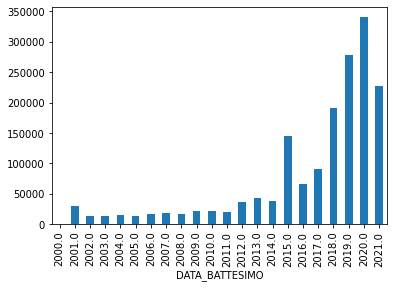

In [80]:
dg['DATA_BATTESIMO'].groupby(dg['DATA_BATTESIMO'].dt.year).count().plot(kind="bar")

In [81]:
dg["DATA_NASCITA"] = dg["DATA_NASCITA"].astype("datetime64")
dg["DATA_NASCITA"] =dg["DATA_NASCITA"].dt.date
dg["DATA_NASCITA"] = dg["DATA_NASCITA"].astype("datetime64")

In [82]:
dg.dtypes

SEX                       object
DATA_NASCITA      datetime64[ns]
REGIONE                   object
PROVINCIA                 object
COMUNE                    object
TIPO_CARTA                object
DATA_BATTESIMO    datetime64[ns]
SALDO_PUNTI               object
dtype: object

<AxesSubplot:xlabel='DATA_NASCITA'>

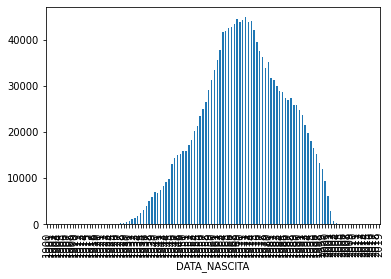

In [83]:
dg['DATA_NASCITA'].groupby(dg['DATA_NASCITA'].dt.year).count().plot(kind="bar")

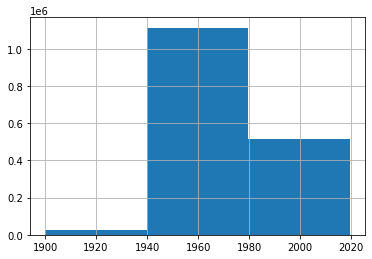

In [84]:
hist = dg['DATA_NASCITA'].hist(bins=3)

In [ ]:
#Age of the Q8 Clients#

In [88]:
now = pd.Timestamp('now')

In [91]:
dg['AGE'] = (now - dg['DATA_NASCITA']).astype('<m8[Y]')

In [99]:
dg['YEARS_AFILLIATE'] = (now - dg['DATA_BATTESIMO']).astype('<m8[Y]')

In [100]:
dg

,SEX,DATA_NASCITA,REGIONE,PROVINCIA,COMUNE,TIPO_CARTA,DATA_BATTESIMO,SALDO_PUNTI,AGE,YEARS_AFILLIATE
COD_PAN_DA_POS,,,,,,,,,,
7071161603018922195,M,1951-09-14,LAZIO,VITERBO,SUTRI,STARQ8_FISICA,2015-01-08,"511,000000",70.0,6.0
7071161603005992565,F,1988-09-15,NaN,NaN,NaN,STARQ8_FISICA,2020-07-10,"379,000000",33.0,1.0
7071161603025867243,F,1943-09-09,LAZIO,ROMA,ROMA,STARQ8_FISICA,2020-07-10,"108,000000",78.0,1.0
7071161603021997861,M,1974-03-01,SICILIA,MESSINA,MESSINA,STARQ8_FISICA,2020-07-10,"100,000000",47.0,1.0
7071161603025554049,M,1963-11-22,CAMPANIA,SALERNO,EBOLI,STARQ8_FISICA,2020-07-10,"284,000000",58.0,1.0
...,...,...,...,...,...,...,...,...,...,...
7071161603672630225,F,1962-06-22,EMILIA ROMAGNA,RIMINI,SAN GIOVANNI IN MARIGNANO,STARQ8_FISICA,2019-11-27,"2741,000000",59.0,2.0
7071161603673015798,M,1967-03-19,LAZIO,ROMA,ROMA,STARQ8_FISICA,2019-03-21,"8996,000000",54.0,2.0
7071161603024035909,M,1987-03-18,SICILIA,PALERMO,PALERMO,STARQ8_FISICA,2021-01-19,"424,000000",34.0,0.0


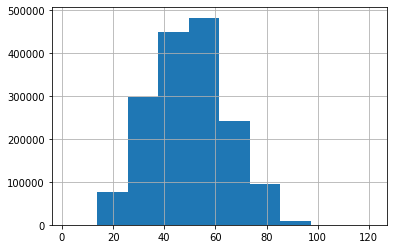

In [95]:
hist = dg['AGE'].hist(bins=10)

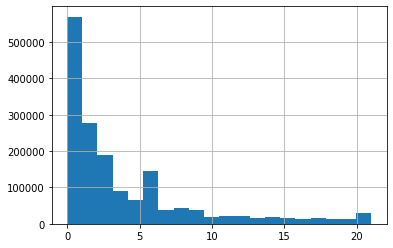

In [112]:
hist = dg['YEARS_AFILLIATE'].hist(bins=20)

In [97]:
dg['AGE'].value_counts()

49.0     44780
52.0     44712
50.0     44311
47.0     44122
48.0     43941
         ...  
2.0          1
109.0        1
104.0        1
107.0        1
111.0        1
Name: AGE, Length: 118, dtype: int64

In [98]:
dg['SEX'].value_counts()

M    1114651
F     541485
Name: SEX, dtype: int64

In [102]:
# see the caategorical variables and the absolute variables of ANAGRAPHICA DATAFRAME
cols_focus_cat = [
    'SEX',
    'REGIONE',
    'TIPO_CARTA',
    ]
cols_focus_num = [
    'SALDO_PUNTI',
    'AGE',
    'YEARS_AFILLIATE'
    ]

In [103]:
cols_focus = cols_focus_cat + cols_focus_num

In [105]:
dg[cols_focus_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1656137.0,49.627476,14.733696,2.0,39.0,50.0,59.0,121.0
YEARS_AFILLIATE,1655941.0,4.177474,4.680234,0.0,1.0,2.0,6.0,21.0


In [106]:
dg[cols_focus_cat].astype(str).describe().transpose()

,count,unique,top,freq
SEX,1656137,3,M,1114651
REGIONE,1656137,21,LOMBARDIA,240771
TIPO_CARTA,1656137,3,STARQ8_FISICA,1497919


In [107]:
def get_frequencies(series: pd.Series, n_categories: int = None, 
                    bins: int = None, dropna: bool = True
                    ) -> pd.DataFrame:
    vc = series.value_counts(ascending=False,
                             bins=bins,
                             dropna=dropna
                            ) 
    if n_categories is not None:
        if not isinstance(n_categories, int) or n_categories <= 0:
            raise TypeError('n_categories should be a strictly positive integer')
        if n_categories < len(vc):
            freq_others = vc.iloc[n_categories - 1:].sum()
            vc = vc.iloc[:n_categories - 1]\
                   .append(pd.Series({'others': freq_others}))
    return pd.DataFrame({'absolute': vc,
                         'relative': vc / len(series) * 100,
                         },
                        index=vc.index
                        )

In [108]:
get_frequencies(dg['SEX'], n_categories=2)

,absolute,relative
M,1114651,67.304275
F,541485,32.695665


In [109]:
get_frequencies(dg['REGIONE'], n_categories=21)

,absolute,relative
LOMBARDIA,240771,14.538109
CAMPANIA,211322,12.759935
SICILIA,201247,12.151591
LAZIO,156526,9.451271
TOSCANA,113771,6.869661
PUGLIA,108151,6.530317
PIEMONTE,100616,6.075343
CALABRIA,89785,5.421351
VENETO,60169,3.633093
EMILIA ROMAGNA,57308,3.460342


In [158]:
get_frequencies(dg['TIPO_CARTA'], n_categories=3)

,absolute,relative
STARQ8_FISICA,1497919,90.446563
STARQ8_VIRTUALE,148678,8.977397
STAR_TRUCK,9540,0.576039


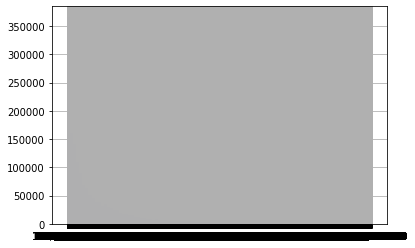

In [182]:
#Points Distribution accross clients
hist = dg['SALDO_PUNTI'].hist(bins=100)


In [65]:
#Rifornimenti_Carburante_ClubQ8 brief analysis
dh=pd.read_csv('master_data/Rifornimenti_Carburante_ClubQ8.csv', sep=';')


In [66]:
dh

,COD_PAN_DA_POS,COD_PV,DATA_OPERAZIONE,PRODOTTO,MODALITA_VENDITA,LITRI,PUNTI_CARBURANTE
0,7071161603600606750,584,2021-03-01 00:00:57,CARICO GASOLIO,EASY,7,3
1,7071161603000039982,155,2021-03-01 00:02:53,CARICO GASOLIO,SELF,17,17
2,7071161603000720656,4803,2021-03-01 00:03:10,CARICO GASOLIO,OPT,39,19
3,7071161603014646483,2491,2021-03-01 00:05:45,CARICO HIPERFORM DIESEL,SERVITO,54,54
4,7071161603011692357,8265,2021-03-01 00:07:29,CARICO GPL,SERVITO,31,31
...,...,...,...,...,...,...,...
11787857,7071161603670650324,1114,2021-08-31 23:58:22,CARICO GASOLIO,SELF,50,50
11787858,7071161603020697769,7064,2021-08-31 23:58:26,CARICO BENZINA,EASY,12,6
11787859,7071161603010864247,7933,2021-08-31 23:58:56,CARICO BENZINA,OPT,9,4
11787860,7071161603601882848,5693,2021-08-31 23:59:03,CARICO GASOLIO,SERVITO,50,50


In [67]:
#sum liters consumption by product 
dh1 = dh.groupby(["PRODOTTO"]).sum()
dh1['LITRI'] = dh.groupby(["PRODOTTO"]).mean()['LITRI']

In [68]:
dh1

,COD_PAN_DA_POS,COD_PV,LITRI,PUNTI_CARBURANTE
PRODOTTO,,,,
ANNULLO CARICO BENZINA,1.735263e+22,1.532300e+07,26.387938,-64680.0
ANNULLO CARICO GASOLIO,2.180746e+22,1.945034e+07,36.736706,-113263.0
ANNULLO CARICO GASOLIO PESANTE,1.888000e+21,1.152847e+06,118.352060,-6325.0
ANNULLO CARICO GPL,1.393019e+21,9.783620e+05,30.456853,-6000.0
ANNULLO CARICO HIPERFORM 100 OTTANI,1.640509e+21,1.083431e+06,29.827586,-6920.0
ANNULLO CARICO HIPERFORM DIESEL,4.419476e+21,3.658608e+06,35.739200,-22327.0
ANNULLO CARICO METANO,2.828465e+19,2.167600e+04,11.750000,-47.0
CARICO BENZINA,3.113654e+25,2.280608e+10,30.558111,131720350.0
CARICO GASOLIO,4.126279e+25,3.086821e+10,44.488438,250583101.0


In [69]:
#ammount of litter clients bought ignoring the different fuels
Total = dh['LITRI'].sum()
print (Total)


478069301


In [70]:
#Considering as active customers those who have the card and made at leat one purchase during the timeframe considered
number_of_active_clients= dh['COD_PAN_DA_POS'].nunique()

In [71]:
number_of_active_clients

957357

In [72]:
#Average ammount of fuel that each individual acquires in Q8 gas stations during the time horizon of our data
Average=Total/number_of_active_clients

In [73]:
Average

499.363665800741

In [80]:
#see the number of total transactions by taking out 2* the value of annullo because those operations were cancelled, in order to see how many times does the average client go to the gas station using its card.
#see the ammount of fuel that each client buys via groupby using then client code --> make an histogram or a table to check the values

Neutralize_canceled_purchases=(2*(len(dh[dh['PRODOTTO'].str.contains('ANNULLO ')])))


In [84]:
Transactions=11787862

In [85]:
Number_of_real_transactions=Transactions-Neutralize_canceled_purchases

In [86]:
Number_of_real_transactions

11774136

In [89]:
Client_rotation=Number_of_real_transactions/number_of_active_clients

In [90]:
Client_rotation

12.298584540563239